In [1]:
import numpy as np
from math import *
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


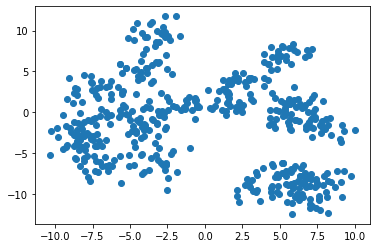

In [2]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0],X[:,1])

In [3]:
def calculate_wcss(data):
  wcss=[]
  for i in range (1,20):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  return wcss

<function matplotlib.pyplot.show>

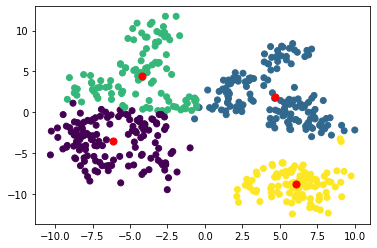

In [6]:
kmeans = KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10)
pred_y= kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show

In [7]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    print(distances.index(max(distances)) + 1)
    return distances.index(max(distances)) + 1

In [8]:
df = X
sum_of_squares = calculate_wcss(df)
n = optimal_number_of_clusters(sum_of_squares)
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(df)


4
